<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Julia María Domínguez Russell y Mariana Valenzuela Lafarga.

**Fecha:** 30 de marzo del 2021.

**Expediente** : 749767 & 749770.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JuliaDomRuss/Proyecto_Simulacion

# Proyecto TEMA-2

## Definición del proyecto

Para este proyecto se va a modelar un tipo de cambio, el cuál es el **dólar (USD/MXN)**.Para poder modelar obtuvimos los datos mensuales del tipo de cambio de la divisa mencionada desde el mes de abril del 2015 hasta el mes de marzo del 2023. Para poder realizar la simulación se utilizarán 4 diferentes nodos los cuáles son el diferencial de inflación, diferencial de crecimiento económico, información histórica del mismo tipo de cambio y tasas de interés entre ambos países.

A continuación se muestra el histograma de los datos sobre el dolar peso:

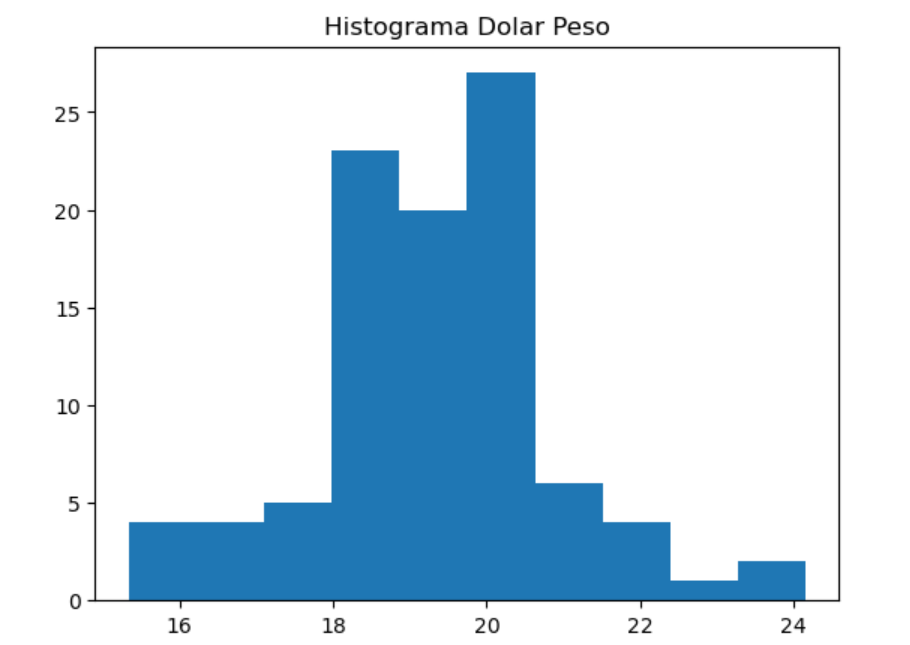

A continuación, se muestra el diagrama para realizar nuestro modelo donde se identifican los “nodos” o “escenarios” a simular.

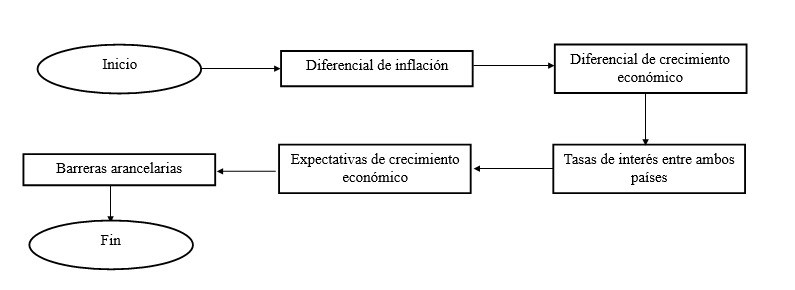

Las variables que tomamos en cuenta en este proyecto son los que creemos que pueden tener un impacto y a su vez guardan una relación con el tipo de cambio. 

Los nodos que tomamos en cuenta en este proyecto son los que creemos que pueden tener un impacto y a su vez guardan una relación con el tipo de cambio. 
- La información histórica del mismo tipo de cambio este es un determinante  importante para el tipo de cambio. Es decir, el valor de la moneda local futura, depende de su valor anterior o sus valores históricos. Haciendolo así un modelo con una parte autoregresiva.
- El diferencial de inflación se refiere a la diferencia que existe entre la tasa de inflación de dos o más países, se va a utilizar como “nodo” ya que suele utilizarse como indicador de la posición competitiva y de la variación relativa de los tipos de cambio a largo plazo.
- El diferencial de crecimiento económico hace referencia a la diferencia que existe entre la tasa de crecimiento económico entre dos o más países, se va a utilizar como "nodo" ya que hay una relación en el largo plazo entre el aumento o dismunición del PIB con el tipo de cambio, por ejemplo un crecimiento del producto interno bruto aprecia la moneda de ese país, es decir, el incremento de la productividad de un país en relación con otros hace que su moneda se aprecie.
- La tasa de interés entre ambos países nos habla acerca de la tasa de interés interna que maneja cada país en el que se ve involucrado el tipo de cambio y hay una relación a corto plazo entre tipo de cambio y tasa de interés por ejemplo si la tasa de interés interna sube y se mantiene constante el tipo de cambio, el rendimiento de los activos locales se eleva en relación con los extranjeros por lo que los inversionistas los demandarán más, ocasionando que la moneda local se aprecie y vicervesa.

### Objetivos

#### Objetivo general: 
Predecir el tipo de cambio dólar (USD/MXN).

#### Objetivos específicos:
- Encontrar la distribución de probabilidad del tipo de cambio USD/MXN.
- Encontrar la distribución de probabilidad del diferencial de inflación.
- Encontrar la distribución de probabilidad del diferencial de crecimiento económico.
- Encontrar la distribución de probabilidad de la tasa de interés entre ambos países.
- Realizar una prueba de hipótesis de la independencia de los nodos.
- Encontrar los pesos de cada nodo para predecir el tipo de cambio USD/MXN.
- Encontrar la ecuación por la cual se rige el tipo de cambio USD/MXN.

### Hipótesis y supuestos

En nuestro modelo tenemos el siguiente supuesto:
- Asumimos que el tipo de cambio entre USD/MXN puede predecirse con estos nodos.

La hipótesis que queremos demostrar es la siguiente:
- Las variables utilizadas para predecir los nodos son independientes estadísticamente.

### Visualización de resultados de simulación.

#### Tipo de cambio